In [3]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

# Ignore warnings for cleaner output
warnings.filterwarnings('ignore')

# Set visual styles
sns.set_style('whitegrid')
plt.style.use('seaborn-v0_8-whitegrid')

In [4]:
# Load the dataset
netflix_df = pd.read_csv('netflix_titles.csv')

In [5]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
# Display basic information about the dataset
print(f"Dataset shape: {netflix_df.shape}")
print("\nFirst 5 rows:")
netflix_df.head()

Dataset shape: (8807, 12)

First 5 rows:


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [7]:
# Check for missing values
print("\nMissing values per column:")
print(netflix_df.isnull().sum())


Missing values per column:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [8]:
# Dataset overview
print("\nDataset information:")
print(netflix_df.info()) # Check data types and non-null counts



Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


In [9]:
# Statistical summary
print("\nStatistical summary of numeric columns:")
print(netflix_df.describe()) # Summary statistics for numeric columns


Statistical summary of numeric columns:
       release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000


In [10]:
# Unique content types
print("\nUnique content types:")
print(netflix_df['type'].value_counts()) # Count of unique content types


Unique content types:
type
Movie      6131
TV Show    2676
Name: count, dtype: int64


## Data Cleaning and Preprocessing

In [11]:
# Fill missing values appropriately
netflix_df['director'].fillna('Unknown', inplace=True)
netflix_df['cast'].fillna('Unknown', inplace=True)
netflix_df['country'].fillna('Unknown', inplace=True)
netflix_df['rating'].fillna('Not Rated', inplace=True)
netflix_df['description'].fillna('No description available', inplace=True) # inplace means fill the missing values in the original dataframe 
netflix_df['duration'].fillna('0 min', inplace=True) # Fill missing duration with '0 min'   

In [12]:
# Extract year from date_added column
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], errors='coerce') # Convert to datetime
# Extract year from date_added
netflix_df['year_added'] = netflix_df['date_added'].dt.year

In [13]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0


In [14]:
# Convert release_year to numeric
netflix_df['release_year'] = pd.to_numeric(netflix_df['release_year'], errors='coerce')

In [15]:
netflix_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019.0
8803,s8804,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019.0
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019.0
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020.0


In [16]:
# Create a column for content age (years between release and being added to Netflix)
netflix_df['content_age'] = netflix_df['year_added'] - netflix_df['release_year']

In [17]:
# Extract genres from listed_in column
netflix_df['genres'] = netflix_df['listed_in'].str.split(', ')

netflix_df.iloc[0, 2] = "pakistan" # Display first row and first three columns

In [18]:
netflix_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,content_age,genres
0,s1,Movie,pakistan,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,1.0,[Documentaries]
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,0.0,"[International TV Shows, TV Dramas, TV Mysteries]"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,0.0,"[Crime TV Shows, International TV Shows, TV Ac..."
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,0.0,"[Docuseries, Reality TV]"
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,0.0,"[International TV Shows, Romantic TV Shows, TV..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019.0,12.0,"[Cult Movies, Dramas, Thrillers]"
8803,s8804,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019.0,1.0,"[Kids' TV, Korean TV Shows, TV Comedies]"
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019.0,10.0,"[Comedies, Horror Movies]"
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020.0,14.0,"[Children & Family Movies, Comedies]"


In [19]:
# Create a new dataframe with one row per genre
genres_df = netflix_df.explode('genres')

In [20]:
genres_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,content_age,genres
0,s1,Movie,pakistan,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,1.0,Documentaries
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,0.0,International TV Shows
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,0.0,TV Dramas
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,0.0,TV Mysteries
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,0.0,Crime TV Shows
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020.0,14.0,Children & Family Movies
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020.0,14.0,Comedies
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019.0,4.0,Dramas
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019.0,4.0,International Movies


netflix_df['country']: This is the original column that lists where the show or movie is from.
Example: "United States, Canada"

.str.split(','): This splits the string into a list of countries using the comma , as the separator.
Result: ["United States", "Canada"]

.str[0]: This picks the first country from the list.
Result: "United States"

.str.strip(): This removes any extra spaces around the country name.
Result: "United States" (no leading/trailing spaces)

netflix_df['main_country'] = ...: Saves this cleaned-up first country into a new column called 'main_country'.

In [21]:
# Clean country data (some entries have multiple countries)
netflix_df['main_country'] = netflix_df['country'].str.split(',').str[0].str.strip()

In [22]:
netflix_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,content_age,genres,main_country
0,s1,Movie,pakistan,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,1.0,[Documentaries],United States
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,0.0,"[International TV Shows, TV Dramas, TV Mysteries]",South Africa
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,0.0,"[Crime TV Shows, International TV Shows, TV Ac...",Unknown
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,0.0,"[Docuseries, Reality TV]",Unknown
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,0.0,"[International TV Shows, Romantic TV Shows, TV...",India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019.0,12.0,"[Cult Movies, Dramas, Thrillers]",United States
8803,s8804,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019.0,1.0,"[Kids' TV, Korean TV Shows, TV Comedies]",Unknown
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019.0,10.0,"[Comedies, Horror Movies]",United States
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020.0,14.0,"[Children & Family Movies, Comedies]",United States


str.extract('(\d+)'): This pulls out the number part from the string.
Example: "90 min" → 90, "2 Seasons" → 2

.astype(float): Converts it to a number (so we can do math later if needed).

Saves this number into a new column called 'duration_value'.

In [23]:
netflix_df['duration_value'] = netflix_df['duration'].str.extract('(\d+)').astype(float)

str.extract('(\D+)'): This pulls out the non-digit part (the words like "min" or "Seasons").
Example: "90 min" → "min", "1 Season" → "Season"

.str.strip(): Cleans up extra spaces from the word.

Saves this word into a new column called 'duration_unit'.

In [24]:
netflix_df['duration_unit'] = netflix_df['duration'].str.extract('(\D+)')

In [25]:
netflix_df['duration_unit'] = netflix_df['duration_unit'].str.strip()

In [26]:
netflix_df


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,content_age,genres,main_country,duration_value,duration_unit
0,s1,Movie,pakistan,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,1.0,[Documentaries],United States,90.0,min
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,0.0,"[International TV Shows, TV Dramas, TV Mysteries]",South Africa,2.0,Seasons
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,0.0,"[Crime TV Shows, International TV Shows, TV Ac...",Unknown,1.0,Season
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,0.0,"[Docuseries, Reality TV]",Unknown,1.0,Season
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,0.0,"[International TV Shows, Romantic TV Shows, TV...",India,2.0,Seasons
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019.0,12.0,"[Cult Movies, Dramas, Thrillers]",United States,158.0,min
8803,s8804,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019.0,1.0,"[Kids' TV, Korean TV Shows, TV Comedies]",Unknown,2.0,Seasons
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019.0,10.0,"[Comedies, Horror Movies]",United States,88.0,min
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020.0,14.0,"[Children & Family Movies, Comedies]",United States,88.0,min


In [27]:
print("Cleaned dataset overview:")
netflix_df

Cleaned dataset overview:


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,content_age,genres,main_country,duration_value,duration_unit
0,s1,Movie,pakistan,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,1.0,[Documentaries],United States,90.0,min
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,0.0,"[International TV Shows, TV Dramas, TV Mysteries]",South Africa,2.0,Seasons
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,0.0,"[Crime TV Shows, International TV Shows, TV Ac...",Unknown,1.0,Season
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,0.0,"[Docuseries, Reality TV]",Unknown,1.0,Season
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,0.0,"[International TV Shows, Romantic TV Shows, TV...",India,2.0,Seasons
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019.0,12.0,"[Cult Movies, Dramas, Thrillers]",United States,158.0,min
8803,s8804,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019.0,1.0,"[Kids' TV, Korean TV Shows, TV Comedies]",Unknown,2.0,Seasons
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019.0,10.0,"[Comedies, Horror Movies]",United States,88.0,min
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020.0,14.0,"[Children & Family Movies, Comedies]",United States,88.0,min


## Exploratory Data Analysis (EDA)

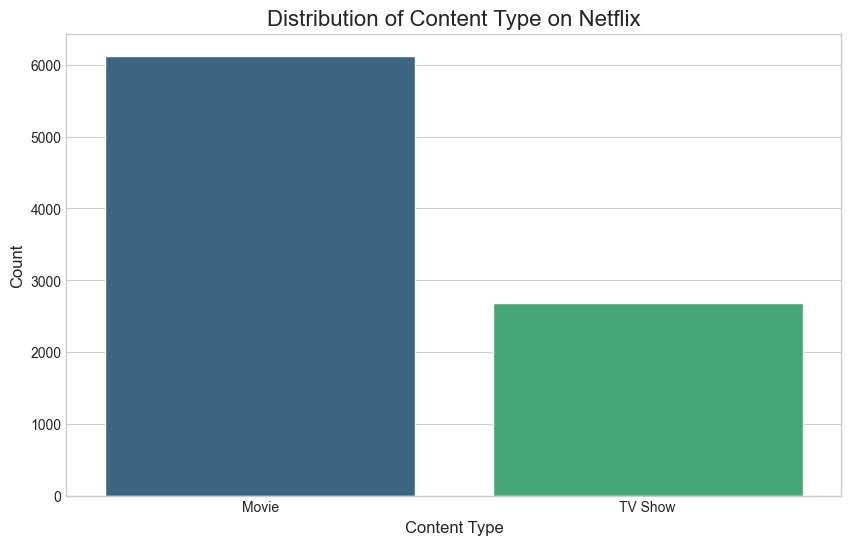

In [59]:
# 1. Content Type Distribution
plt.figure(figsize=(10, 6))
content_counts = netflix_df['type'].value_counts() # Count of each content type
sns.barplot(x=content_counts.index, y=content_counts.values, palette='viridis') 
plt.title('Distribution of Content Type on Netflix', fontsize=16)
plt.xlabel('Content Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)
plt.show()

In [60]:
content_counts

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

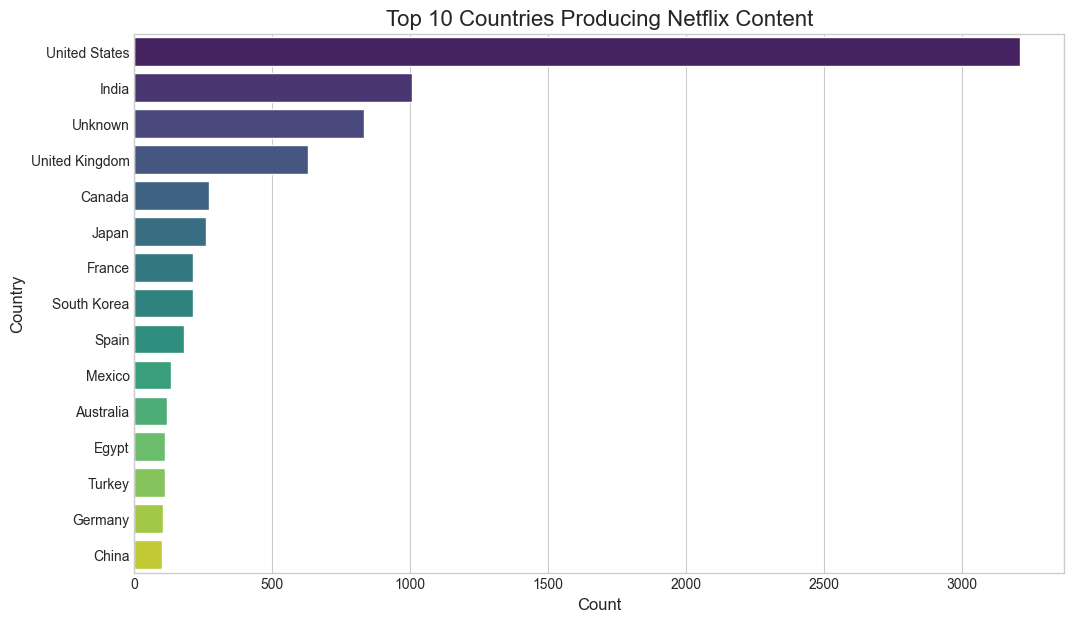

In [ ]:
# 2. Top 10 Countries Producing Content
plt.figure(figsize=(12, 7))
country_counts = netflix_df['main_country'].value_counts().head(10)
sns.barplot(x=country_counts.values, y=country_counts.index, palette='viridis') 
plt.title('Top 10 Countries Producing Netflix Content', fontsize=16) 
plt.xlabel('Count', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.show()

In [30]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,content_age,genres,main_country,duration_value,duration_unit
0,s1,Movie,pakistan,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,1.0,[Documentaries],United States,90.0,min
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,0.0,"[International TV Shows, TV Dramas, TV Mysteries]",South Africa,2.0,Seasons
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,0.0,"[Crime TV Shows, International TV Shows, TV Ac...",Unknown,1.0,Season
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,0.0,"[Docuseries, Reality TV]",Unknown,1.0,Season
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,0.0,"[International TV Shows, Romantic TV Shows, TV...",India,2.0,Seasons


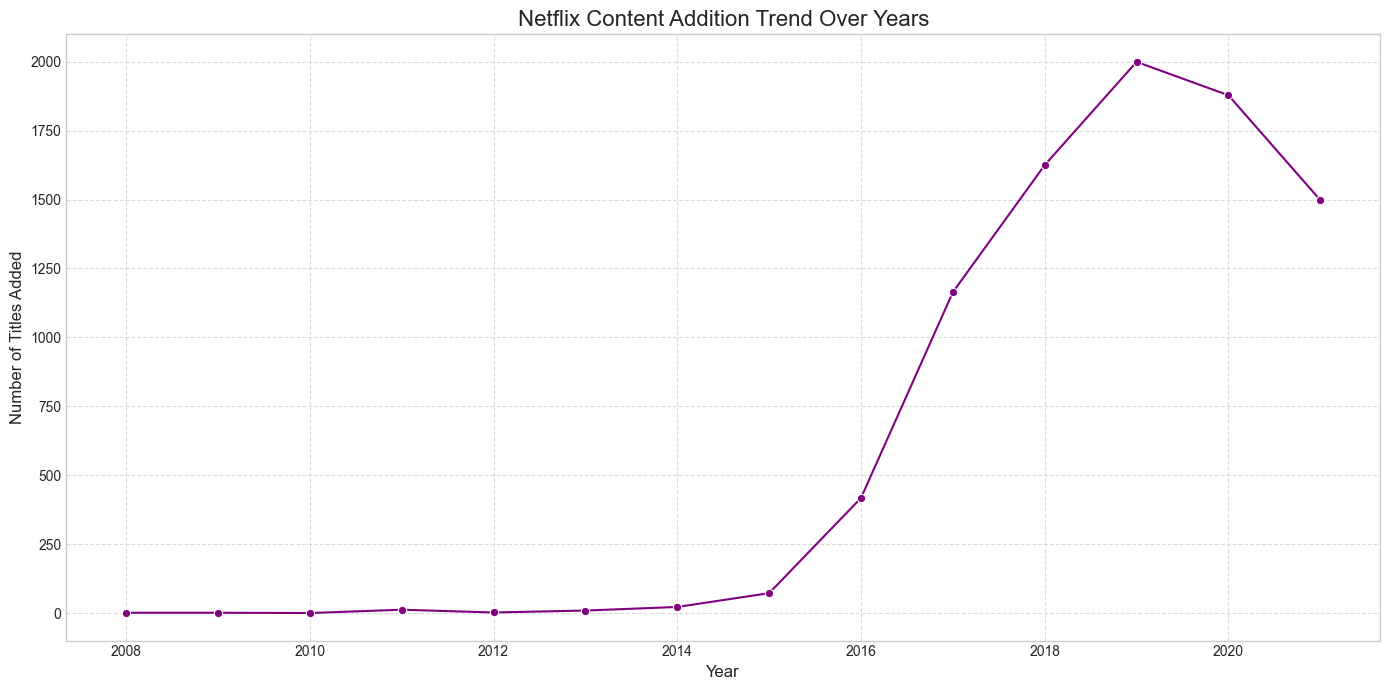

In [70]:
# 3. Content Addition Trend Over Years
plt.figure(figsize=(14, 7))
year_counts = netflix_df['year_added'].value_counts().sort_index() #  Count of titles added per year
sns.lineplot(x=year_counts.index, y=year_counts.values, marker='o', color='purple')
plt.title('Netflix Content Addition Trend Over Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Titles Added', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [68]:
year_counts

year_added
2008.0       2
2009.0       2
2010.0       1
2011.0      13
2012.0       3
2013.0      10
2014.0      23
2015.0      73
2016.0     418
2017.0    1164
2018.0    1625
2019.0    1999
2020.0    1878
2021.0    1498
Name: count, dtype: int64

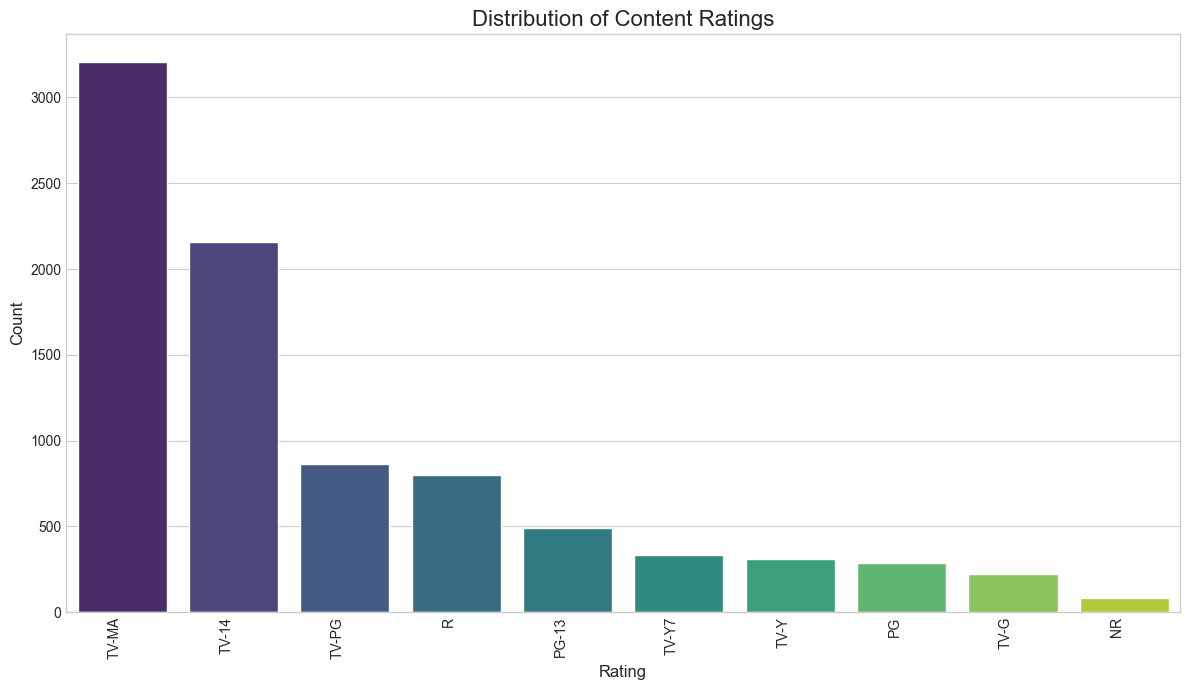

In [ ]:
# 4. Rating Distribution
plt.figure(figsize=(12, 7))
rating_counts = netflix_df['rating'].value_counts().sort_values(ascending=False).head(10) # Count of each rating
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')
plt.title('Distribution of Content Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('rating_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

In [71]:
rating_counts

rating
TV-MA    3207
TV-14    2160
TV-PG     863
R         799
PG-13     490
TV-Y7     334
TV-Y      307
PG        287
TV-G      220
NR         80
Name: count, dtype: int64

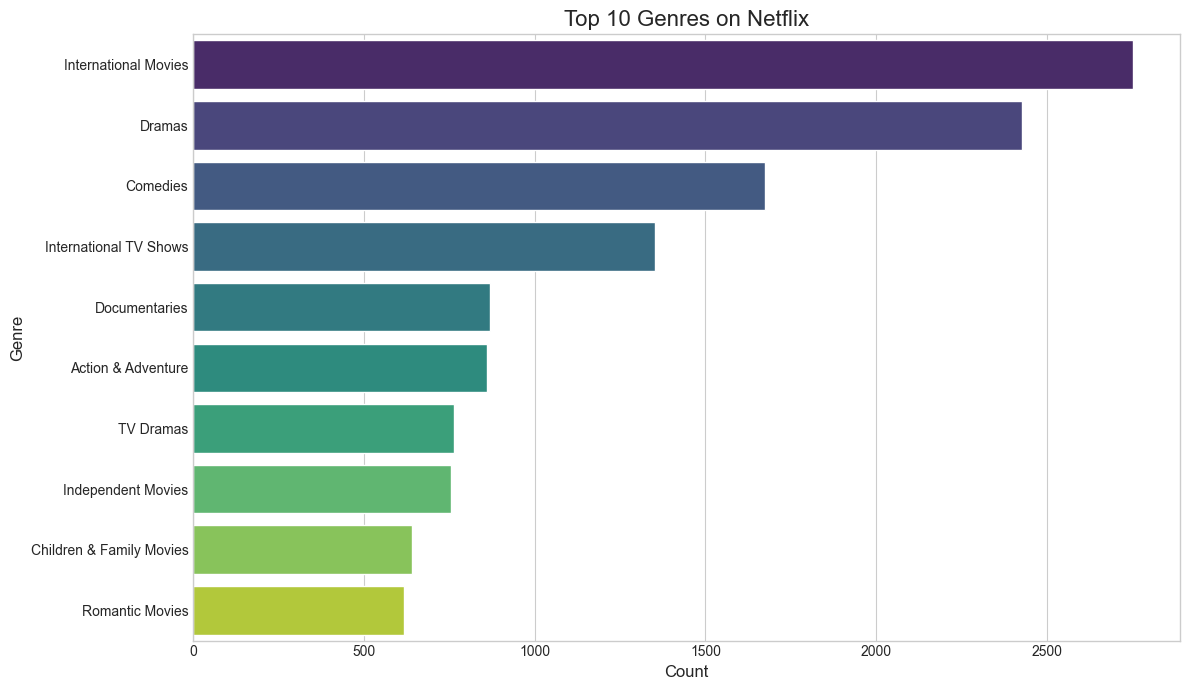

In [33]:
# 5. Top 10 Genres
genre_counts = genres_df['genres'].value_counts().head(10)
plt.figure(figsize=(12, 7))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.title('Top 10 Genres on Netflix', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.tight_layout()
plt.savefig('top_genres.png', dpi=300, bbox_inches='tight')
plt.show()

## Data Visualization in Ploty

In [ ]:
import plotly.express as px
# import plotly.graph_objects as go
# from plotly.subplots import make_subplots

This line creates a pie chart using Plotly Express (px.pie).

netflix_df is your DataFrame with Netflix data.

names='type' means we’re grouping the data by the type column — probably with values like "Movie" and "TV Show".

title=... sets the title of the pie chart.

color_discrete_sequence=... chooses a bright color theme (Vivid) for the pie slices.

In [ ]:
# 1. Interactive Content Type Distribution
fig1 = px.pie(netflix_df, names='type', title='Distribution of Movies and TV Shows on Netflix',
             color_discrete_sequence=px.colors.qualitative.Vivid)

fig1.update_traces(textposition='inside', textinfo='percent+label')
fig1.update_layout(title_x=0.5)
fig1.show()

Groups your Netflix dataset by year_added and type (e.g., "Movie", "TV Show").

.size() counts how many titles were added for each group.

.reset_index(name='count') turns the group results into a DataFrame with a column called 'count'.

Creates a line chart using Plotly Express.

x='year_added': puts the year on the x-axis.

y='count': number of titles on the y-axis.

color='type': draws separate lines for Movies and TV Shows.

labels=...: renames axes and legend labels for clarity.

color_discrete_sequence=...: uses a colorful palette for better visuals.

In [ ]:
# 3. Interactive Content Addition Trends by Type
year_type_df = netflix_df.groupby(['year_added', 'type']).size().reset_index(name='count') # Group by year and type
year_type_df = year_type_df.dropna()

fig3 = px.line(year_type_df, x='year_added', y='count', color='type',
              title='Content Addition Trends by Type',
              labels={'year_added': 'Year', 'count': 'Number of Titles', 'type': 'Content Type'},
              color_discrete_sequence=px.colors.qualitative.Vivid) # Use qualitative color palette
fig3.update_layout(title_x=0.5, hovermode='x unified')
fig3.show()

In [46]:
year_type_df

,year_added,type,count
0,2008.0,Movie,1
1,2008.0,TV Show,1
2,2009.0,Movie,2
3,2010.0,Movie,1
4,2011.0,Movie,13
5,2012.0,Movie,3
6,2013.0,Movie,6
7,2013.0,TV Show,4
8,2014.0,Movie,19
9,2014.0,TV Show,4


Groups the filtered data by year and genre.

Counts how many titles were added per genre each year.

Resets the index so the result becomes a clean DataFrame with a count column.

In [83]:
# 4. Interactive Genre Popularity Over Time
# First, get top 5 genres
top_genres = genres_df['genres'].value_counts().head(5).index.tolist() # Get the top genres
# Filters the full genre dataset to only keep rows that belong to those top 5 genres.
genre_year_df = genres_df[genres_df['genres'].isin(top_genres)] # Filter for top genre 
genre_year_counts = genre_year_df.groupby(['year_added', 'genres']).size().reset_index(name='count')
genre_year_counts = genre_year_counts.dropna()

fig4 = px.line(genre_year_counts, x='year_added', y='count', color='genres',
              title='Top Genre Popularity Trends Over Time',
              labels={'year_added': 'Year of movies', 'count': 'Number of Titles', 'genres': 'Genre'},
              color_discrete_sequence=px.colors.qualitative.Bold)
fig4.update_layout(title_x=0.5)
fig4.show()

In [50]:
top_genres

['International Movies',
 'Dramas',
 'Comedies',
 'International TV Shows',
 'Documentaries']

In [ ]:
genre_year_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,content_age,genres
0,s1,Movie,pakistan,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,1.0,Documentaries
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,0.0,International TV Shows
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,0.0,International TV Shows
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,0.0,International TV Shows
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021.0,28.0,Dramas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019.0,12.0,Dramas
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019.0,10.0,Comedies
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020.0,14.0,Comedies
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019.0,4.0,Dramas


In [54]:
genre_year_counts

,year_added,genres,count
0,2008.0,Dramas,1
1,2009.0,Dramas,1
2,2009.0,International Movies,1
3,2011.0,Dramas,13
4,2011.0,International Movies,1
5,2012.0,Comedies,2
6,2012.0,Documentaries,1
7,2013.0,Comedies,1
8,2013.0,Documentaries,1
9,2013.0,International TV Shows,1
